In [2]:
import pandas as pd
import numpy as np
import os
import re
from hanspell import spell_checker
import kss
from tqdm.notebook import tqdm

In [2]:
every = pd.read_excel('everytime_best.xlsx',index_col=0)

In [3]:
type(every.title[0])

str

In [4]:
type(every.context[0])

str

In [5]:
lst = []
for i in range(every.shape[0]):
    lst.append(every.context[i].replace('[','').replace(']','').replace("'",''))

In [6]:
every.context = lst

In [7]:
lst2 = []
for i in range(every.shape[0]):
    lst2.append(every.title[i] + ' '+ every.context[i])

In [8]:
every.context = lst2

In [9]:
every = every[['days','like','daegle','scrape','context']]

In [10]:
every

days  like  daegle  scrape  \
0         21/07/12 01:02   496      33    1271   
1         21/08/22 17:22   462      97      32   
2         21/10/26 21:58   449      40     816   
3         21/11/19 22:04   354      50       2   
4         21/09/07 16:48   349     110      74   
..                   ...   ...     ...     ...   
377  2020-06-26 18:05:00   104      14       2   
378  2020-05-12 14:44:00   104     143       3   
379  2020-02-15 03:10:00   103      11       0   
380  2020-06-30 01:27:00   103      54       1   
381  2020-03-21 04:56:00   102      22       1   

                                               context  
0    ÌÜ†Ïùµ RC Í≥µÎûµÎ≤ï ‚àô ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä 700 Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ ‚àô‚àô...  
1    Î∞îÎÄîÎ¶¨ ÏóÜÎäî ÌïôÏÉùÏ¶ù Ïã¨Ïã¨Ìï¥ÏÑú ÎßåÎì§Ïñ¥Î¥Ñ ÏùºÎã® ÌïôÏÉùÏ¶ù Î≥¥Í≥† ÎÑàÎ¨¥ Ïò•ÏÉâÏóê Ï¥åÏä§Îü¨ÏõåÏÑú ÏÇ¨Ïö©...  
2    Ïª¥Ìôú 1Í∏â ÌïÑÍ∏∞, Ïã§Í∏∞ Í≥µÎ∂ÄÎ≤ï Í∑∏Î¶¨Í≥† ÍøÄÌåÅ https://m.blog.naver.c...  
3    Ï¥ùÌïô Í∏∞Ìò∏ 1Î≤à ÌïòÎÇò ÏÇ¨Ìá¥ÌïòÏÑ∏Ïöî. Í≤∞Í≥º Î∞úÌëú ÎÇòÏûêÎßàÏûê Ïù¥Îî¥ÏãùÏúºÎ°ú ÌñâÎèôÌïòÎäîÎç∞ Ïñ¥ÎñªÍ≤å ...  
4    ÎÇò Ïûò ÏßñÎäîÎã§ „Öà„Ñ±„Ñ¥, 0:10, 0:11, Ìï´Í≤å Î≥¥ÎÇ¥Ï§¨ÎÑ§.. Í≥†ÎßàÏõåÏÑú ÌïúÎ≤à Îçî Ïßñ...  
..                                                 ...  
377  ÌïúÌïôÍ∏∞ ÎèôÏïà ... Îß§Î≤à Î∞ùÏùÄ ÏñºÍµ¥Î°ú ÌôòÏòÅÌï¥Ï£ºÏÖîÏÑú Í≥†ÎßàÏõ†ÏäµÎãàÎã§ „Ö†„Ö† Í≥†ÎßôÏßÄÎßå ÎëêÎ≤à ...  
378  Í≥†ÏñëÏù¥ Ï¢ãÏïÑÌïòÍ≥† ÏßëÏóêÏÑú Í∏∞Î•¥ÎäîÍ±¥ ÏÉÅÍ¥ÄÏóÜÎäîÎç∞ Í∏∏Í≥†ÏñëÏù¥ Î∞•Ï±ôÍ≤®Ï£ºÎäîÍ±¥ Ïã´Ïñ¥Ìï® ÎÇòÎèÑ ÌÅ¨ÏßëÏÇ¨...  
379                                   ÌïôÍµêÏù¥Î¶Ñ Ïù¥Í±∞Ïñ¥Îïå? Í≤ΩÎÇ®ÎåÄÎî±ÎåÄ  
380  Î∞òÏàò ÎßàÏùå Î®πÏùÄ ÏÇ¨ÎûåÎì§ Îπ®Î¶¨ ÏàòÎä•Í≥µÎ∂ÄÌï¥Îùº Ï†úÎ∞ú ÏóêÌÉÄÏóêÎã§Í∞Ä ÏßÑÏ£ºÎûë Í≤ΩÏÉÅÎåÄ ÌòÑÌÉÄÏò®Îã§Îäî ...  
381  üì¢NÎ≤àÎ∞© ÏÇ¨Í±¥ÎßåÌÅº ÎçîÎüΩÎã§ Ï£ºÎ≥ÄÏóê Ïª§ÎÆ§ÎãàÌã∞ ÏÇ¨Ïù¥Ìä∏ Î£®Î¶¨ÏõπÏùÑ ÌïòÎäî ÏÇ¨ÎûåÏù¥ ÏûàÎã§Î©¥ Í∑∏ ÏÇ¨...  

[382 rows x 5 columns]

In [11]:
def SC_clean(data):
    '''
    ÌäπÏàòÎ¨∏Ïûê(Speical Characters) ÏÇ≠Ï†ú
    '''
    check_strings = re.compile('[^ „Ñ±-„Ö£Í∞Ä-Ìû£ | 0-9]+')
    jungli = check_strings.sub('',data)
    jungli = jungli.replace('|',' ')
    return jungli

In [12]:
lst = []
for i in tqdm(every.context):
    if pd.isna(i) == True:
        lst.append('')
        pass
    else:
        test_sent = SC_clean(i)
        non_number = ''
    for j in test_sent.split(' '):
        if re.search('\d',j) == None:
            non_number = non_number + ' ' + j
    non_number = non_number.strip()
    ### 500Ïûê Ï†úÌïú Î¨∏Ï†ú
    strings = ''
    for counting_num in kss.split_sentences(non_number):
        if len(counting_num) >499:
            interval_num = round(len(counting_num.split(' '))/2)
            a = ' '.join(counting_num.split(' ')[:interval_num])
            b = ' '.join(counting_num.split(' ')[interval_num:])
            result_a = spell_checker.check(a)
            result_b = spell_checker.check(b)
            strings = result_a.checked + ' ' + result_b.checked
        else:
            result = spell_checker.check(counting_num)
            strings = strings +' '+ result.checked
    
    cleaning_sentence = strings.strip()
    test_strings = ''
    for sent in kss.split_sentences(cleaning_sentence):
        test_strings = test_strings + ' ' + sent
    test_strings = test_strings.strip()
    lst.append(test_strings)

[Korean Sentence Splitter]: Initializing Pynori...


In [13]:
every['clean'] = lst

In [62]:
# every.to_excel('everytime_clean.xlsx')

In [14]:
every.sort_values('scrape',ascending=False)

days  like  daegle  scrape  \
0         21/07/12 01:02   496      33    1271   
9         21/08/14 18:04   283      18    1205   
131       21/05/10 13:32   227      37    1018   
6         21/08/31 00:55   317      93    1015   
257       20/07/22 20:24   162      32    1014   
..                   ...   ...     ...     ...   
284       20/12/08 04:51   127      31       0   
215  2021-06-19 18:34:00   103      25       0   
216  2021-05-21 18:04:00   102      22       0   
66        21/10/28 12:02   127      24       0   
142       21/05/25 15:45   179      44       0   

                                               context  \
0    ÌÜ†Ïùµ RC Í≥µÎûµÎ≤ï ‚àô ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä 700 Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ ‚àô‚àô...   
9    ‚≠êÏ∑®Î¶∞Ïù¥Î•º ÏúÑÌïú Ï∑®ÏóÖ Ï§ÄÎπÑ ÏãúÏûë Î∞©Î≤ï Ï†ïÎ¶¨‚≠ê ÎãπÏû•Ïóê Ï∑®ÏóÖÏùÑ Ï§ÄÎπÑÌï¥Ïïº ÌïòÎäîÎç∞,, Ïñ¥Îñª...   
131  Ïû¨ÏàòÍ∞ïÌïòÎ†§Îäî ÏπúÍµ¨Îì§ÏïÑ ! Ï∞∏Í≥†Ìï¥ ! 1ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê D+Î∞õÏùÄ Í≥ºÎ™© 2ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê ...   
6    ÏßÑÏ£ºÏÇ¨Îäî Í≤ΩÎåÄÏÉùÏù¥ ÎßõÏßëÏ∂îÏ≤úÌï® ÏßÑÏ£ºÏôÄÏûàÎäî Ïï†ÏÜ°Ïù¥Îì§ÏïÑ ÏÑ†Î∞∞Í∞Ä ÎßõÏßëÏ∂îÏ≤úÌï¥Ï£ºÍªò!, ÏπúÍµ¨Îì§Ïù¥...   
257  ÌïúÎä•Í≤Ä Ï§ÄÎπÑ ÌåÅ! Ïù¥Î≤àÏóê 6/27 ÌïúÍµ≠ÏÇ¨ ÏãúÌóò 1Í∏â Î∞õÏïòÏäµÎãàÎãπ !, Í∑∏ÎûòÏÑú ÌåÅÏùÑ Ï†ï...   
..                                                 ...   
284  ÏïÑÎãà Ï¢Ä ÏÉùÍ∞ÅÏ¢Ä ÌïòÍ≥†ÏÇ¨ÏÑ∏Ïöî Ï†ÄÎäî ÎÇ®ÏûêÏßÄÎßå Ïó¨ÏûêÍ∞Ä Ïû†ÏïàÏò®Îã§Í≥† Ïû¨ÏõåÏ§ÑÎ†§Í≥† ÎãπÏã†Îì§ÌïúÌÖå Ï†Ñ...   
215                    Í∑∏ÎûòÏÑú Ï∞ΩÎØºÏù¥Îäî Ïñ∏Ï†úÏØ§ Ìá¥ÌïôÎãπÌï®? ÍπúÎπµÏùÄ Ïñ∏Ï†ú Îì§Ïñ¥Í∞ÄÍ≥†?   
216  [Í≤ΩÎåÄÏã†Î¨∏] ÏÑ±ÎπÑÏúÑÎ°ú ‚ÄòÌï¥ÏûÑ‚Äô Ï≤òÎ∂ÑÎ∞õÏùÄ ÏûêÏó∞Í≥ºÌïôÎåÄ Ï∂úÏã† A ÍµêÏàò, Í∑∏ Ïù¥ÌõÑ ‚ûñÎ≥∏Î∂Ä ...   
66   Ï§ëÍ∞ÑÍ≥†ÏÇ¨ Ï°∞Ï°åÏúºÎ©¥ Í∞úÏ∂î „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã Í∏∞ÎßêÎèÑ Ïù¥ Íº¨ÎùºÏßÄ ÎÇ† Í≤É Í∞ôÏúºÎ©¥ Í∞úÏ∂î „Öã„Öã„Öã...   
142  (ÏÑ§Î¨∏Ï°∞ÏÇ¨) Í≥ºÍ∏∞ÎåÄÎûë Í≤ΩÏÉÅÎåÄÎûë Ï∞®Ïù¥ÎÇúÎã§Í≥† ÏÉùÍ∞ÅÌïòÎ©¥ Ï∂îÏ≤ú Í≥ºÍ∏∞ÎåÄÎûë Í≤ΩÏÉÅÎåÄÎûë Í∞ôÎã§Í≥† ÏÉù...   

                                                 clean  
0    ÌÜ†Ïùµ Í≥µÎûµÎ≤ï ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ Î®ºÏ†Ä ÌíÄÏñ¥Î≥∏Îã§ Ìïú Î≤à...  
9    Ï∑®Î¶¨ ÎÇòÏù¥Î•º ÏúÑÌïú Ï∑®ÏóÖ Ï§ÄÎπÑ ÏãúÏûë Î∞©Î≤ï Ï†ïÎ¶¨ ÎãπÏû•Ïóê Ï∑®ÏóÖÏùÑ Ï§ÄÎπÑÌï¥Ïïº ÌïòÎäîÎç∞ Ïñ¥ÎñªÍ≤å ...  
131  Ïû¨ÏàòÍ∞ïÌïòÎ†§Îäî ÏπúÍµ¨Îì§ÏïÑ Ï∞∏Í≥†Ìï¥ Î∞õÏùÄ Í≥ºÎ™© Î∞õÍ≥† Îì£Í≥† Îì§Ïñ¥ÏÑú Ï†ïÎ¶¨ÌïòÎ©¥ Ïû¨ÏàòÍ∞ïÌñàÏúºÎãà ÏµúÏ¥à...  
6    ÏßÑÏ£º ÏÇ¨Îäî Í≤ΩÎåÄÏäπÏù¥ Îßõ Ïßë Ï∂îÏ≤úÌï® ÏßÑÏ£ºÏôÄ ÏûàÎäî Ïï†ÏÜ°Ïù¥Îì§ÏïÑ ÏÑ†Î∞∞Í∞Ä Îßõ Ïßë Ï∂îÏ≤úÌï¥Ï§ÑÍ≤å ...  
257  ÌïúÎä•Í≤Ä Ï§ÄÎπÑ ÌåÅ Ïù¥Î≤àÏóê ÌïúÍµ≠ÏÇ¨ ÏãúÌóòÎ∞õÏïòÏäµÎãàÎã§ Í∑∏ÎûòÏÑú ÌåÅÏùÑ Ï†ïÎ¶¨Ìï¥ÏÑú ÌïúÍµ≠ÏÇ¨ ÏãúÌóò Ï§ÄÎπÑ...  
..                                                 ...  
284  ÏïÑÎãà Ï¢Ä ÏÉùÍ∞Å Ï¢Ä ÌïòÍ≥† ÏÇ¨ÏÑ∏Ïöî Ï†ÄÎäî ÎÇ®ÏûêÏßÄÎßå Ïó¨ÏûêÍ∞Ä Ïû† Ïïà Ïò®Îã§Í≥† Ïû¨ÏõåÏ£ºÎ†§Í≥† ÎãπÏã†Îì§...  
215                      Í∑∏ÎûòÏÑú Ï∞ΩÎØºÏù¥Îäî Ïñ∏Ï†úÏØ§ Ìá¥ÌïôÎãπÌï® Í∞êÎ∞©ÏùÄ Ïñ∏Ï†ú Îì§Ïñ¥Í∞ÄÍ≥†  
216  Í≤ΩÎåÄ Ïã†Î¨∏ ÏÑ±Í∏∞ ÏúÑÎ°ú Ìï¥ÏûÑ Ï≤òÎ∂Ñ Î∞õÏùÄ ÏûêÏó∞ Í≥ºÌïôÎåÄ Ï∂úÏã† ÍµêÏàò Í∑∏ Ïù¥ÌõÑ Î≥∏Î∂Ä Ìï¥ÏûÑ Ï≤ò...  
66   Ï§ëÍ∞ÑÍ≥†ÏÇ¨ Ï°∞Ï°åÏúºÎ©¥ Í∞úÏ∂î „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã Í∏∞ÎßêÎèÑ Ïù¥ Íº¨ÎùΩÏÑúÎãà ÎÇ† Í≤É Í∞ôÏúºÎ©¥ Í∞úÏ∂î „Öã„Öã...  
142  ÏÑ§Î¨∏Ï°∞ÏÇ¨ Í≥ºÍ∏∞ÎåÄÎûë Í≤ΩÏÉÅÎåÄÎûë Ï∞®Ïù¥ ÎÇúÎã§Í≥† ÏÉùÍ∞ÅÌïòÎ©¥ Ï∂îÏ≤ú Í≥ºÍ∏∞ÎåÄÎûë Í≤ΩÏÉÅÎåÄÎûë Í∞ôÎã§Í≥† ÏÉùÍ∞Å...  

[382 rows x 6 columns]

In [15]:
every[every.scrape>200].sort_values('scrape',ascending=False)

days  like  daegle  scrape  \
0    21/07/12 01:02   496      33    1271   
9    21/08/14 18:04   283      18    1205   
131  21/05/10 13:32   227      37    1018   
6    21/08/31 00:55   317      93    1015   
257  20/07/22 20:24   162      32    1014   
13   21/07/27 21:08   255      29     897   
140  21/06/07 00:06   187      39     890   
2    21/10/26 21:58   449      40     816   
183  21/01/01 01:03   125      56     782   
208  21/01/27 00:37   108      15     743   
164  21/06/11 04:30   143      24     693   
207  21/01/26 14:42   108      42     559   
126  21/04/21 22:41   267      17     531   
168  21/03/02 05:29   140      80     515   
17   21/10/20 16:01   222      47     491   
280  20/07/23 13:17   130      22     470   
234  20/12/13 04:21   238      18     442   
85   21/12/31 14:35   111       4     417   
33   21/07/28 19:54   178      67     410   
129  21/03/01 16:09   242      29     387   
320  20/05/16 22:56   217       6     379   
52   21/09/02 13:45   138      11     338   
159  21/01/10 10:53   150      80     318   
89   21/07/12 22:02   108       7     305   
31   21/11/27 15:46   188      21     269   

                                               context  \
0    ÌÜ†Ïùµ RC Í≥µÎûµÎ≤ï ‚àô ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä 700 Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ ‚àô‚àô...   
9    ‚≠êÏ∑®Î¶∞Ïù¥Î•º ÏúÑÌïú Ï∑®ÏóÖ Ï§ÄÎπÑ ÏãúÏûë Î∞©Î≤ï Ï†ïÎ¶¨‚≠ê ÎãπÏû•Ïóê Ï∑®ÏóÖÏùÑ Ï§ÄÎπÑÌï¥Ïïº ÌïòÎäîÎç∞,, Ïñ¥Îñª...   
131  Ïû¨ÏàòÍ∞ïÌïòÎ†§Îäî ÏπúÍµ¨Îì§ÏïÑ ! Ï∞∏Í≥†Ìï¥ ! 1ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê D+Î∞õÏùÄ Í≥ºÎ™© 2ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê ...   
6    ÏßÑÏ£ºÏÇ¨Îäî Í≤ΩÎåÄÏÉùÏù¥ ÎßõÏßëÏ∂îÏ≤úÌï® ÏßÑÏ£ºÏôÄÏûàÎäî Ïï†ÏÜ°Ïù¥Îì§ÏïÑ ÏÑ†Î∞∞Í∞Ä ÎßõÏßëÏ∂îÏ≤úÌï¥Ï£ºÍªò!, ÏπúÍµ¨Îì§Ïù¥...   
257  ÌïúÎä•Í≤Ä Ï§ÄÎπÑ ÌåÅ! Ïù¥Î≤àÏóê 6/27 ÌïúÍµ≠ÏÇ¨ ÏãúÌóò 1Í∏â Î∞õÏïòÏäµÎãàÎãπ !, Í∑∏ÎûòÏÑú ÌåÅÏùÑ Ï†ï...   
13   ÏûêÌïÑ ÏÑúÎ™ÖÏùÑ ÌïúÍ∏Ä ÌååÏùºÏóê ÎÑ£Ïñ¥Î≥¥Ïûê! ÏïàÎÖï Í≤ΩÏÉÅÎåÄÌïôÏö∞Î∂ÑÎì§, , ÏµúÍ∑ºÏóê ÎπÑÎåÄÎ©¥ ÎïåÎ¨∏Ïóê ...   
140  lms ÎèôÏòÅÏÉÅ Îã§Ïö¥Î°úÎìú Î∞©Î≤ï Í≥µÏú†Ìï©ÎãàÎã§. ÏãúÌóòÍ∏∞Í∞ÑÏóê Í≥µÎ∂ÄÌïòÍ∏∞ Ïã´Ïñ¥ÏÑú Ïó¥Ïã¨Ìûà ÎªòÏßìÌïòÎã§...   
2    Ïª¥Ìôú 1Í∏â ÌïÑÍ∏∞, Ïã§Í∏∞ Í≥µÎ∂ÄÎ≤ï Í∑∏Î¶¨Í≥† ÍøÄÌåÅ https://m.blog.naver.c...   
183  Í≤ΩÏÉÅÎåÄ Í∞ÄÏûÖÌïòÎ©¥ ÎàÑÎ¶¥ Ïàò ÏûàÎäî ÌòúÌÉùÎì§ , 1. ÎßàÏù¥ÌÅ¨Î°ú ÏÜåÌîÑÌä∏ Ïò§ÌîºÏä§ Î¨¥Î£åÏÇ¨Ïö©, Ìïô...   
208  tmi) ÎÇ¥Í∞Ä Ïò¨Î†∏Îçò Í≤åÏãúÍ∏ÄÎì§... , ÏßÑÏßú ÎßéÎÑ§Ïöî., , 0. ÏóêÌÉÄ ÌïëÌîÑÍ∞Ä ÎêòÏßÄ ...   
164  lms Ïó¥Îûå Í∏∞Í∞Ñ ÏßÄÎÇú Í∞ïÏùò Î≥¥ÎäîÎ≤ï Í≥µÏú†Ìï® ÏãúÌóò Í∏∞Í∞ÑÏù∏Îç∞ Í∞ïÏùò Îã´ÌòÄÏÑú Î™ª Î≥¥ÏãúÎäî Î∂Ñ...   
207  ÏßÄÎÇòÍ∞ÄÎçò 4ÌïôÎÖÑÏûÖÎãàÎã§ ~! ÏãúÍ∞ÑÌëú Ï°∞ÌöåÎäî Ïñ¥ÎîîÏÑú? Í≤ΩÏÉÅÎåÄÌïôÍµê Ï†ïÎ≥¥ÎÇòÎàîÌÑ∞ - ÏàòÍ∞ï,Í∞ï...   
126  Í≤ΩÎÇ® Ïù¥Ï†ÑÏßÄÏó≠Ïù∏Ïû¨ Í≥µÍ∏∞ÏóÖ Î¶¨Ïä§Ìä∏ 1. ÌïúÍµ≠ÌÜ†ÏßÄÏ£ºÌÉùÍ≥µÏÇ¨(LH), , 2. ÌïúÍµ≠ÎÇ®ÎèôÎ∞úÏ†Ñ...   
168  Learning X Í∞ïÏùò Ïç®Î≥¥Î©¥ÏÑú ÎäêÎÇÄ Ï†ê Ïù¥Í±∞ Ïì¥Îã§Í≥† 4ÏãúÍ∞ÑÎèôÏïà Í∞ïÏùòÎßå Î™á Í∞ú Îì§...   
17   [655->835] üçíÌÜ†Ïùµ 2Îã¨ Í≥µÎ∂Ä ÌõÑÍ∏∞üçífeat Íµ≠Ï†úÏñ¥ÌïôÏõê Í∞ïÏùò, Í∑∏ Ïô∏ ÎèÖÌïô ...   
280  Ïñ¥Ï†ú Ìï´Í≤åÍ∞Ñ ÌïúÍµ≠ÏÇ¨ ÌåÅÏò¨Î¶∞ ÏÇ¨ÎûåÏù∏Îç∞Ïöî ÏöîÏïΩÎ≥∏ Ïò¨Î†§Îã¨ÎùºÌï¥ÏÑú Ïò¨Î†§Î≥ºÍ≤åÏöî ÏòàÏ†ÑÏóê ÌïúÍµ≠ÏÇ¨ ...   
234  ÌÅ¨Î°¨(ÎòêÎäî Ïó£ÏßÄ)ÏóêÏÑú Ï∞®ÏÑ∏ÎåÄ Ïù¥Ïö©ÌïòÎäîÎ≤ï ÌÅ¨Î°≠ÏõπÏä§ÌÜ†Ïñ¥(https://chrome.go...   
85   üíª ÏûêÎ£åÏ°∞ÏÇ¨Í∞Ä Ïñ¥Î†µÎã§Í≥†? ÍøÄÌåÅ ÏïåÎ†§Ï§ÑÍ≤å ! üçØ ÏïàÎÖïÌïòÏÑ∏Ïöî, Ïù∏Ïû¨Í∞úÎ∞úÏõê ÏÑúÌè¨ÌÑ∞Ï¶à 5Í∏∞...   
33   Í≥µÍ∏∞ÏóÖ Ìï©Í≤©ÏàòÍ∏∞!!! Í≥µÍ∏∞ÏóÖ Ï∑®ÏóÖÌñàÏäµÎãàÎã§!, , ÌïúÍµ≠Í∞ÄÏä§Í∏∞Ïà†Í≥µÏÇ¨ Í∏∞Í≥ÑÏßÅ ÏµúÏ¢ÖÌï©Í≤©ÌñàÏäµ...   
129  ÌïëÌîÑ ÎãµÎãµÌï¥ÏÑú ÎÇ¥Í∞Ä Ï†ïÎ¶¨ÌñàÎã§ ÎåìÍ∏ÄÎ°ú Ï∂îÍ∞ÄÌï†Í±∞ ÏûàÏùå Ï†ÅÏñ¥Î¥ê, Í∑∏Îüº ÎÇ¥Í∞Ä Ï†ïÎ¶¨Ìï¥ÏÑú ÏÉùÍ∞Å...   
320  ÌÜ†ÏùµÎü¨ Ïó¨Îü¨Î∂Ñ, Part7 Ìë∏Îäî Î∞©Î≤ïÏóê ÎåÄÌï¥ ÎèÑÏõÄÏù¥ ÎêòÍ≥†Ïûê Í∏ÄÏùÑ ÏîÅÎãàÎã§. Part7...   
52   ÎÇ¥Í∞Ä Î≥ºÎ†§Í≥† Ïò¨Î¶¨Îäî Í∞úÏñë ÌÑ∞ÎØ∏ÎÑê Î≤ÑÏä§ ÏãúÍ∞ÑÌëú(21.08.31) ÎÇ¥Í∞Ä Î≥ºÎ†§Í≥† Ïò¨Î¶¨ÏßÄÎßå...   
159  Í∑∏ÎàÑÏï†) ÏßÑÏ£ºÏó≠ÏÑ∏Í∂å Ïò§ÌîºÏä§ÌÖî Ï¥ùÏ†ïÎ¶¨ ÏßÄÎÇúÏ£ºÎ∂ÄÌÑ∞ Ïù¥ Ï†ïÎ≥¥Î•º ÏõêÌïòÎäî ÌïôÏö∞ÎãòÎì§Ïù¥ ÎßéÍ∏∏Îûò,...   
89   ÌÜ†Ïùµ LC Í≥µÎûµÎ≤ï LCÎäî ÏãúÌóò Îïå ÎßêÍ≥† Ìëº Ï†ÅÏù¥ Î≥ÑÎ°ú ÏóÜÎã§Î≥¥Îãà ÎÖ∏Î†•Ìï¥ÏÑú Ï†êÏàò Ïò¨Î¶∞ ...   
31   Ïò§Îäò Î≠ê Î®

In [16]:
every[every.like>390].sort_values('like',ascending=False)

days  like  daegle  scrape  \
113  21/06/07 11:06   882      47       1   
310  20/04/13 16:04   502      17       0   
0    21/07/12 01:02   496      33    1271   
114  21/05/26 15:30   466      16       2   
1    21/08/22 17:22   462      97      32   
222  20/09/01 22:09   455      20       3   
2    21/10/26 21:58   449      40     816   
115  21/06/13 07:08   419      31       0   
223  20/08/25 11:33   418      58       2   
224  20/09/14 01:02   406      37       4   
311  20/03/16 12:48   405      18       1   
225  20/11/12 15:20   401     126      41   
116  21/05/25 21:10   394      60      15   
226  20/08/04 23:03   393      29       0   

                                               context  \
113  Ïó¨Í∏∞ Î≤ÑÌäºÏù¥ ÌïòÎÇòÏûàÏäµÎãàÎã§ Ïù¥Î≤ÑÌäºÏùÑ ÎàÑÎ•¥Î©¥ ÎãπÏã†ÏùÄ Ïù¥Î≤àÌïôÍ∏∞ Ïò¨ A+Î•º ÎßûÍ≤åÎê©ÎãàÎã§, Ìïò...   
310    Ï¢ãÏïÑÏöî Î∞ïÏ†úÌïòÎ©¥ 1ÌïôÍ∏∞ Ïã∏Í∞ï ÏñºÎßàÎÇò ÎßéÏùÄ ÌïôÏÉùÎì§Ïù¥ 1ÌïôÍ∏∞ Ïã∏Í∞ïÏùÑ ÏõêÌïòÎäîÏßÄ Î≥¥Ïó¨Ï§çÏãúÎã§.   
0    ÌÜ†Ïùµ RC Í≥µÎûµÎ≤ï ‚àô ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä 700 Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ ‚àô‚àô...   
114  Ï∂îÏ≤ú ÎàÑÎ•¥Îäî ÏπúÍµ¨Îì§ Îã§Îì§ Í∏∞ÎßêÍ≥†ÏÇ¨ Ïûò ÏπòÏûê!! 2021ÎÖÑ 1ÌïôÍ∏∞ÎèÑ A+ ÎßéÏù¥ Î∞õÏïÑ~...   
1    Î∞îÎÄîÎ¶¨ ÏóÜÎäî ÌïôÏÉùÏ¶ù Ïã¨Ïã¨Ìï¥ÏÑú ÎßåÎì§Ïñ¥Î¥Ñ ÏùºÎã® ÌïôÏÉùÏ¶ù Î≥¥Í≥† ÎÑàÎ¨¥ Ïò•ÏÉâÏóê Ï¥åÏä§Îü¨ÏõåÏÑú ÏÇ¨Ïö©...   
222  Î™áÏùº Ï†ÑÏóê 10Îèô Ïì∞Î†àÍ∏∞ ÏàòÍ±∞Ïû•ÏóêÏÑú 10Îèô Ï≤≠ÏÜåÌï¥ Ï£ºÏãúÎäî Ïñ¥Î®∏ÎãòÏùÑ Î¥§Îã§. Í∑∏Î∂ÑÏùÄ ÏßÅ...   
2    Ïª¥Ìôú 1Í∏â ÌïÑÍ∏∞, Ïã§Í∏∞ Í≥µÎ∂ÄÎ≤ï Í∑∏Î¶¨Í≥† ÍøÄÌåÅ https://m.blog.naver.c...   
115                    ÏïÑÏßÅÎèÑ ÏãúÌóò ÏïàÎÅùÎÇú ÏÇ¨ÎûåÎì§ Í∞úÏ∂î „Öã„Öã„Öã„Öã„Öã„Öã„Öã ÏùºÎã®ÎÇòÎ∂ÄÌÑ∞   
223  Î∞∞Îã¨ Í∏∞ÏÇ¨Îãò Í∞ÑÏãù ÏóòÎ†àÎ≤†Ïù¥ÌÑ∞ ÏóÜÎäî ÏûêÏ∑®Î∞©Ïù¥Í∏∞ÎèÑ ÌïòÍ≥† Ïò§ÎäòÎî∞Îùº Î¨¥Í±∞Ïö¥ Î¨ºÍ±¥ÏùÑ ÎÑàÎ¨¥ Îßé...   
224  ÌÜµÌï© ÎãµÎãµÌï¥ÏÑú Í∏Ä Ïì¥Îã§ Í≤ΩÎÇ®Í≥ºÌïôÍ∏∞Ïà†ÎåÄÌïôÍµê ÎåÄÌïôÍ∏∞Î≥∏Ïó≠ÎüâÏßÑÎã® ÌèâÍ∞Ä, Í≤ΩÎÇ®Í≥ºÍ∏∞ÎåÄ - Ïó≠Îüâ...   
311  ÏïÑÎãà ÏÑúÎ≤ÑÍ¥ÄÎ¶¨ÎèÑ ÏïàÌïòÎ©¥ÏÑú Ïñ¥ÎñªÍ≤å Ï†ÑÍµêÏÉù Ïã∏Í∞ïÏùÑ Ìï† ÏÉùÍ∞ÅÏùÑ Ìï¥ ÏßÑÏßúÍ∞úÎπ°ÏπòÎÑ§„Öã„Öã„Öã„Öã„Öã„Öã...   
225  ls ÌïôÏö∞Î∂ÑÎì§(ÌäπÌûà Ïó¨ÌïôÏö∞Î∂ÑÎì§) „Öá„Ñ±„Öá ÍµêÏàòÍ∞Ä Í∞úÏù∏Ï†ÅÏúºÎ°ú Î∂ÄÎ•¥Î©¥, ÎÖπÏùåÍ∏∞ ÏºúÍ≥† Ìò∏Ïã†...   
116  <2021 WITH U Í≥µÍ≥ºÎåÄÌïô ÌïôÏÉùÌöåÏû•ÏóêÍ≤å ÏöîÍµ¨Ìï©ÎãàÎã§.> Í∑º Î™áÎÖÑÍ∞Ñ ÌïôÍµêÎ•º Îã§ÎãàÎ©¥...   
226                     Í≥µÍ∞êÎàÑÎ•¥Î©¥ Î∂ÄÎ™®Îãò ÎßåÏàòÎ¨¥Í∞ï, , ÏãùÌíàÏûêÏõêÍ≤ΩÏ†úÌïôÍ≥º ÌôîÏù¥ÌåÖ   

                                                 clean  
113  Ïó¨Í∏∞ Î≤ÑÌäºÏù¥ ÌïòÎÇò ÏûàÏäµÎãàÎã§ Ïù¥ Î≤ÑÌäºÏùÑ ÎàÑÎ•¥Î©¥ ÎãπÏã†ÏùÄ Ïù¥Î≤à ÌïôÍ∏∞ Ïò§Î•º ÎßûÍ≤å Îê©ÎãàÎã§ Ìïò...  
310             Ï¢ãÏïÑÏöî Î∞ïÏ†úÌïòÎ©¥ ÏÇ¥Í∞ï ÏñºÎßàÎÇò ÎßéÏùÄ ÌïôÏÉùÎì§Ïù¥ ÏÇ¨Í∞ïÏùÑ ÏõêÌïòÎäîÏßÄ Î≥¥Ïó¨Ï§çÏãúÎã§  
0    ÌÜ†Ïùµ Í≥µÎûµÎ≤ï ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ Î®ºÏ†Ä ÌíÄÏñ¥Î≥∏Îã§ Ìïú Î≤à...  
114                      Ï∂îÏ≤ú ÎàÑÎ•¥Îäî ÏπúÍµ¨Îì§ Îã§Îì§ Í∏∞ÎßêÍ≥†ÏÇ¨ Ïûò ÏπòÏûê ÎßéÏù¥ Î∞õÏïÑ  
1    Î∞îÎÄî Î¶¨ ÏóÜÎäî ÌïôÏÉùÏ¶ù Ïã¨Ïã¨Ìï¥ÏÑú ÎßåÎì§Ïñ¥Î¥Ñ ÏùºÎã® ÌïôÏÉùÏ¶ù Î≥¥Í≥† ÎÑàÎ¨¥ Ïò•ÏÉâÏóê Ï¥åÏä§Îü¨ÏõåÏÑú ÏÇ¨...  
222  Î©∞Ïπ† Ï†ÑÏóê Ïì∞Î†àÍ∏∞ ÏàòÍ±∞Ïû•ÏóêÏÑú Ï≤≠ÏÜåÌï¥ Ï£ºÏãúÎäî Ïñ¥Î®∏ÎãòÏùÑ Î¥§Îã§ Í∑∏Î∂ÑÏùÄ ÏßÅÏ†ë ÏÜêÏúºÎ°ú ÎßéÏùÄ ...  
2    Ïª¥Ìôú ÌïÑÍ∏∞ Ïã§Í∏∞ Í≥µÎ∂ÄÎ≤ï Í∑∏Î¶¨Í≥† ÍøÄÌåÅ Í∞ì Ï†ÑÏó≠ÌïòÍ≥† Î≠ò Ìï†Íπå Í≥†ÎØºÌïòÎã§Í∞Ä Ïª¥Ìôú ÏãúÌóòÏùÑ Ïπò...  
115                  ÏïÑÏßÅÎèÑ ÏãúÌóò Ïïà ÎÅùÎÇú ÏÇ¨ÎûåÎì§ Í∞úÏ∂î „Öã„Öã„Öã„Öã„Öã„Öã„Öã ÏùºÎã® ÎÇòÎ∂ÄÌÑ∞  
223  Î∞∞Îã¨ Í∏∞ÏÇ¨Îãò Í∞ÑÏãù ÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞ ÏóÜÎäî ÏûêÏ∑®Î∞©Ïù¥Í∏∞ÎèÑ ÌïòÍ≥† Ïò§ÎäòÎî∞Îùº Î¨¥Í±∞Ïö¥ Î¨ºÍ±¥ÏùÑ ÎÑàÎ¨¥ Îßé...  
224  ÌÜµÌï© ÎãµÎãµÌï¥ÏÑú Í∏Ä Ïì¥Îã§ Í≤ΩÎÇ®Í≥ºÌïôÍ∏∞Ïà†ÎåÄÌïôÍµê ÎåÄÌïô Í∏∞Î≥∏Ïó≠ÎüâÏßÑÎã® ÌèâÍ∞Ä Í≤ΩÎÇ®Í≥ºÍ∏∞ÎåÄ Ïó≠Îüâ Í∞ï...  
311  ÏïÑÎãà ÏÑúÎ≤Ñ Í¥ÄÎ¶¨ÎèÑ Ïïà ÌïòÎ©¥ÏÑú Ïñ¥ÎñªÍ≤å Ï†ÑÍµêÏÉù ÏÇ¨Í∞ïÏùÑ Ìï† ÏÉùÍ∞ÅÏùÑ Ìï¥ ÏßÑÏßú Í∞úÌôî ÎÇòÎÑ§·Ñè·Ñè...  
225  ÌïôÏö∞Î∂ÑÎì§ ÌäπÌûà Ïó¨ÌïôÏö∞Î∂ÑÎì§ „Öá„Ñ±„Öá ÍµêÏàòÍ∞Ä Í∞úÏù∏Ï†ÅÏúºÎ°ú Î∂ÄÎ•¥Î©¥ ÎÖπÏùåÍ∏∞ ÏºúÍ≥† Ìò∏Ïã†Ïö©Ìíà Îì§Í≥†...  
116  Í≥µÍ≥ºÎåÄÌïô ÌïôÏÉùÌöåÏû•ÏóêÍ≤å ÏöîÍµ¨Ìï©ÎãàÎã§ Í∑º Î™á ÎÖÑÍ∞Ñ ÌïôÍµêÎ•º Îã§ÎãàÎ©¥ÏÑú Í∞êÏÇ¨ Ï†êÏàòÍ∞Ä Ï∞çÌûå Í≤ÉÏùÑ...  
226       

In [17]:
everyword_df = pd.read_excel('everytime_count_words_220105 (1).xlsx',index_col=0)

In [18]:
scrap_words_df = everyword_df.iloc[every[every.scrape>200].sort_values('scrape',ascending=False).index,:]

In [19]:
lst2 = []
for i in scrap_words_df.index:
    lst = []
    for j in list(scrap_words_df.loc[i,:]):
        if type(j) == str:
            lst.append(j)
        else:
            pass
            
    lst2.append(lst)

In [20]:
num = 0
for i in lst2:
    num += len(i)

In [21]:
num

2328

In [3]:
from wordcloud import WordCloud

In [23]:
lst3 = []
for i in lst2:
    lst3.extend(i)

In [24]:
from collections import Counter
counts = Counter(lst3)

In [25]:
tags = counts.most_common(100)

In [26]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMRHD.TTF')

In [27]:
cloud = wc.generate_from_frequencies(dict(tags))

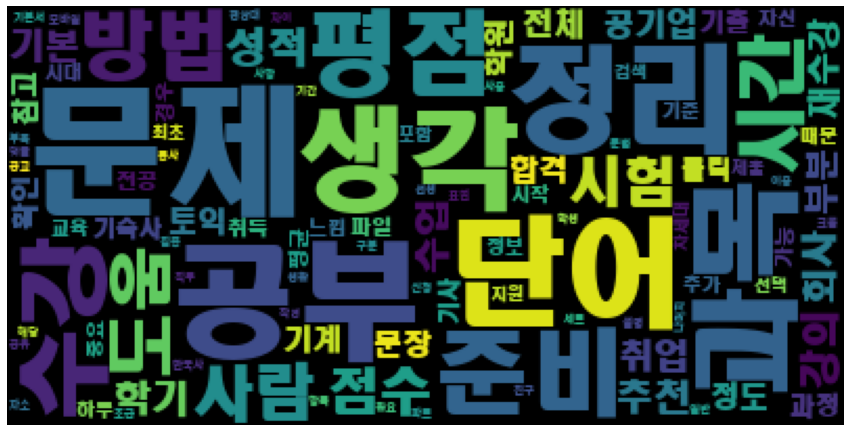

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(cloud)

In [29]:
lst = []
for i in tags:
    lst.append(i[0])

In [30]:
lst

['Î¨∏Ï†ú',
 'Í≥µÎ∂Ä',
 'Îã®Ïñ¥',
 'Ï†ïÎ¶¨',
 'ÏÉùÍ∞Å',
 'Í≥ºÎ™©',
 'Ï§ÄÎπÑ',
 'ÌèâÏ†ê',
 'ÏàòÍ∞ï',
 'Î∞©Î≤ï',
 'ÏãúÍ∞Ñ',
 'ÎèÑÏõÄ',
 'ÏÇ¨Îûå',
 'ÏãúÌóò',
 'Ï†êÏàò',
 'ÏÑ±Ï†Å',
 'Í∞ïÏùò',
 'Ï∂îÏ≤ú',
 'ÌöåÏÇ¨',
 'ÌïôÍ∏∞',
 'ÏàòÏóÖ',
 'Ï∑®ÏóÖ',
 'Í∏∞Î≥∏',
 'Î∂ÄÎ∂Ñ',
 'Ïû¨ÏàòÍ∞ï',
 'Ï†ÑÏ≤¥',
 'Í≥µÍ∏∞ÏóÖ',
 'ÌÜ†Ïùµ',
 'Î¨∏Ïû•',
 'Ï†ïÎèÑ',
 'ÌïôÏõê',
 'Ìï©Í≤©',
 'Í∏∞Í≥Ñ',
 'ÌôïÏù∏',
 'Ï∞∏Í≥†',
 'Í∏∞Ï∂ú',
 'ÌÅ¥Î¶≠',
 'Í≥ºÏ†ï',
 'Í∏∞ÏàôÏÇ¨',
 'Í∏∞ÏÇ¨',
 'Í≤ΩÏö∞',
 'ÌèâÍ∑†',
 'Ï†ÑÍ≥µ',
 'ÌååÏùº',
 'Í∞ÄÎä•',
 'Ï∑®Îìù',
 'ÏûêÏã†',
 'ÏãúÏûë',
 'ÌïòÎ£®',
 'Í∏∞Ï§Ä',
 'ÎäêÎÇå',
 'Ï§ëÏöî',
 'ÎïåÎ¨∏',
 'Ï∂îÍ∞Ä',
 'ÍµêÏú°',
 'ÏãúÎåÄ',
 'Ï†ïÎ≥¥',
 'Ìè¨Ìï®',
 'ÏÑ†ÌÉù',
 'Í≤ÄÏÉâ',
 'ÏßÄÏõê',
 'ÏµúÏ¥à',
 'Ï∞®ÏÑ∏ÎåÄ',
 'Ï†úÏ∂ú',
 'ÌïúÍµ≠ÏÇ¨',
 'Íµ¨Î∂Ñ',
 'ÏÇ¨Ïö©',
 'Í≤ΩÏÉÅÎåÄ',
 'Î™®Î∞îÏùº',
 'Ï∞®Ïù¥',
 'Ìï¥Îãπ',
 'ÎèôÏÇ¨',
 'ÌëúÌòÑ',
 'Ï°∞Í∏à',
 'ÏßÅÎ¨¥',
 'Ìï≠Î™©',
 'ÏπúÍµ¨',
 'ÏÇ¨Ìï≠',
 'ÌïÑÏöî',
 'Í∏∞Í∞Ñ',
 'ÌååÌä∏',
 'Í≥µÏú†',
 'ÏßëÏ§ë',
 'ÌïôÏÉù',
 'Ïã†Ï≤≠',
 'ÌÅ¨Î°¨',
 'Í∏∞Î≥∏ÏÑú',
 'ÏÑ∏Ìä∏',
 'Î¨∏Î≤ï

In [31]:
bar_df = pd.DataFrame(tags)

In [32]:
bar_df

0   1
0    Î¨∏Ï†ú  41
1    Í≥µÎ∂Ä  34
2    Îã®Ïñ¥  29
3    Ï†ïÎ¶¨  28
4    ÏÉùÍ∞Å  26
..  ...  ..
95   ÏûêÏÜå   5
96   Ïù¥Ïö©   5
97   ÏÉùÌôú   5
98  ÎÇòÎ®∏ÏßÄ   5
99   ÏÑ†ÏÉù   5

[100 rows x 2 columns]

In [34]:
# ## ÌïúÍ∏Ä Íπ®Ïßê Ìï¥Í≤∞ ÏΩîÎìú

# import platform
# from matplotlib import font_manager, rc
# path = "c:/Windows/Fonts/malgun.ttf"
# if platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# else:
#     print('Unknown system... sorry~~~~')

In [33]:
font_manager.FontProperties(fname=path).get_name()

NameError: name 'font_manager' is not defined

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

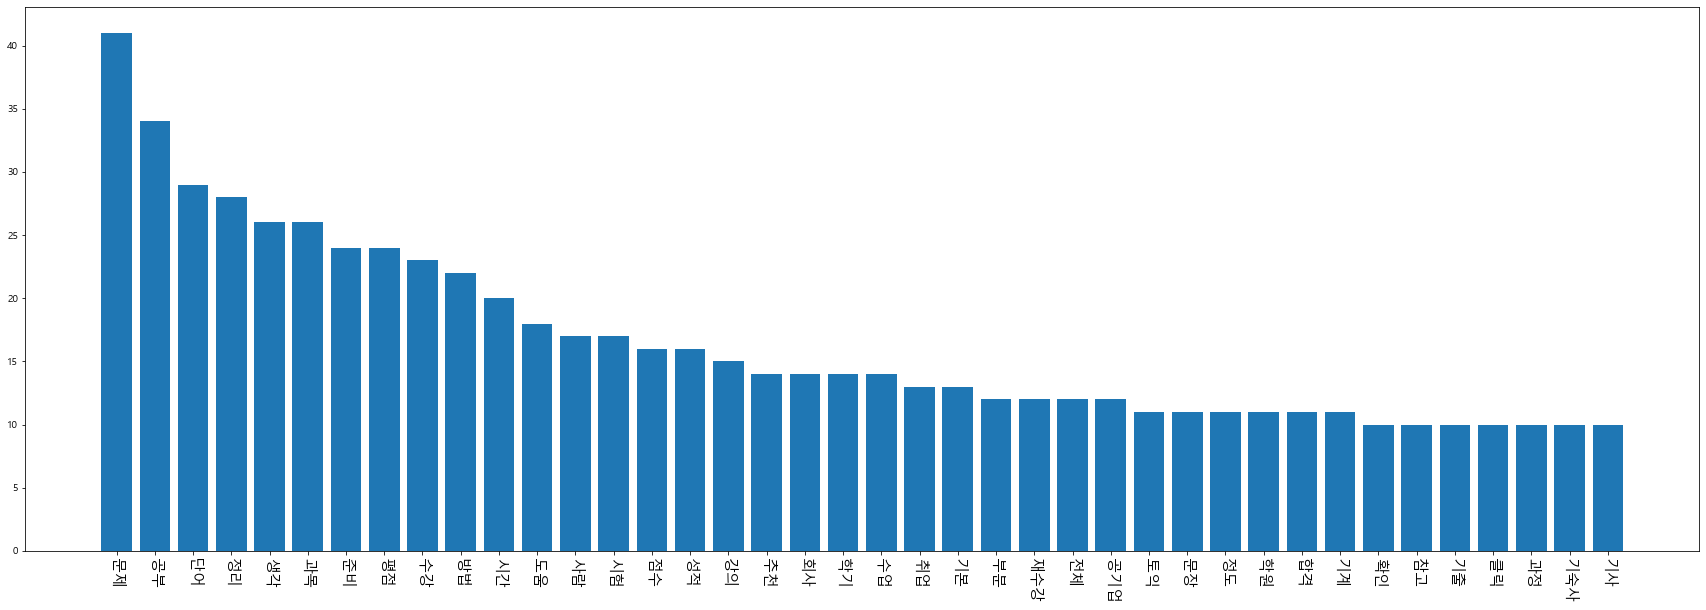

In [35]:
plt.figure(figsize=(30,10))
plt.bar(bar_df.iloc[:40,0],bar_df.iloc[:40,1])
plt.xticks(rotation=270,fontsize=15)
plt.yticks(fontsize = 10)

In [36]:
dictonary = dict()
for i in lst:
    abc = every[every.clean.str.contains(i)]
    a = list(abc[abc.scrape>200].index)
    dictonary[i] = a

In [37]:
list(abc[abc.scrape>200].index)

[17, 257]

In [38]:
list(dictonary.values())

[[0, 17, 33, 89, 168, 208, 257],
 [0, 2, 17, 33, 89, 140, 257],
 [0, 17, 89],
 [0, 9, 17, 33, 89, 129, 131, 159, 257, 280],
 [0, 2, 9, 13, 17, 33, 85, 89, 129],
 [13, 33, 131, 164, 168, 207, 208],
 [6, 9, 17, 33, 131, 257],
 [131],
 [129, 131, 207, 208],
 [0, 9, 13, 33, 140, 164, 168, 207, 208, 320],
 [0, 2, 9, 13, 17, 33, 89, 168, 207],
 [0, 2, 17, 33, 89, 257, 280, 320],
 [0, 6, 33, 89, 164, 280],
 [2, 17, 89, 126, 140, 164, 257],
 [0, 9, 17, 89],
 [17, 33, 131, 168, 207],
 [17, 129, 140, 164, 168, 207, 208],
 [0, 6, 9, 17, 33, 89, 129, 131],
 [9],
 [9, 33, 131, 140],
 [129, 131, 168, 207, 208],
 [9, 33, 131],
 [0, 9, 13, 17, 131, 207],
 [0, 9, 13, 17, 33, 89, 129],
 [131],
 [17, 129, 131],
 [33, 126, 131],
 [0, 17, 33, 89, 320],
 [0, 17, 89],
 [0, 17, 33, 89, 131],
 [0, 17, 33, 89],
 [2, 9, 33],
 [33],
 [9, 89, 129, 164, 168],
 [6, 9, 13, 31, 85, 89, 129, 131, 164, 207],
 [17, 33, 257],
 [13, 140, 164, 234],
 [13, 207, 208],
 [208],
 [33],
 [0, 13, 33, 89, 168, 207],
 [131],
 [33, 1

In [39]:
dictonary

{'Î¨∏Ï†ú': [0, 17, 33, 89, 168, 208, 257],
 'Í≥µÎ∂Ä': [0, 2, 17, 33, 89, 140, 257],
 'Îã®Ïñ¥': [0, 17, 89],
 'Ï†ïÎ¶¨': [0, 9, 17, 33, 89, 129, 131, 159, 257, 280],
 'ÏÉùÍ∞Å': [0, 2, 9, 13, 17, 33, 85, 89, 129],
 'Í≥ºÎ™©': [13, 33, 131, 164, 168, 207, 208],
 'Ï§ÄÎπÑ': [6, 9, 17, 33, 131, 257],
 'ÌèâÏ†ê': [131],
 'ÏàòÍ∞ï': [129, 131, 207, 208],
 'Î∞©Î≤ï': [0, 9, 13, 33, 140, 164, 168, 207, 208, 320],
 'ÏãúÍ∞Ñ': [0, 2, 9, 13, 17, 33, 89, 168, 207],
 'ÎèÑÏõÄ': [0, 2, 17, 33, 89, 257, 280, 320],
 'ÏÇ¨Îûå': [0, 6, 33, 89, 164, 280],
 'ÏãúÌóò': [2, 17, 89, 126, 140, 164, 257],
 'Ï†êÏàò': [0, 9, 17, 89],
 'ÏÑ±Ï†Å': [17, 33, 131, 168, 207],
 'Í∞ïÏùò': [17, 129, 140, 164, 168, 207, 208],
 'Ï∂îÏ≤ú': [0, 6, 9, 17, 33, 89, 129, 131],
 'ÌöåÏÇ¨': [9],
 'ÌïôÍ∏∞': [9, 33, 131, 140],
 'ÏàòÏóÖ': [129, 131, 168, 207, 208],
 'Ï∑®ÏóÖ': [9, 33, 131],
 'Í∏∞Î≥∏': [0, 9, 13, 17, 131, 207],
 'Î∂ÄÎ∂Ñ': [0, 9, 13, 17, 33, 89, 129],
 'Ïû¨ÏàòÍ∞ï': [131],
 'Ï†ÑÏ≤¥': [17, 129, 131],
 'Í≥µÍ∏∞ÏóÖ': [33, 126, 131],
 'ÌÜ†

In [4]:
import networkx as nx

In [40]:
lst = []
for i in dictonary.keys():
    for j in dictonary[i]:
        lst.append((i,j))

In [14]:
# a = 'ÏÉùÌôúÍ¥Ä Í¥ÄÏÉù ÏùÑ Î™®Ïßë Ìï©ÎãàÎã§'
# b = 'ÏÉùÌôúÍ¥Ä Í¥ÄÏÉù ÏùÑ Ï∂îÍ∞Ä Î™®Ïßë Ìï©ÎãàÎã§'
# c = 'ÏùºÎ≥∏ ÍµêÌôòÌïôÏÉù ÏùÑ Î™®Ïßë Ìï©ÎãàÎã§'
tst = pd.DataFrame([['A','A','A','A','B','B','B','B','B','C','C','C','C'],['ÏÉùÌôúÍ¥Ä','Í¥ÄÏÉù','Î™®Ïßë','Ìï©ÎãàÎã§','ÏÉùÌôúÍ¥Ä','Í¥ÄÏÉù','Ï∂îÍ∞Ä','Î™®Ïßë','Ìï©ÎãàÎã§','ÏùºÎ≥∏','ÍµêÌôòÌïôÏÉù','Î™®Ïßë','Ìï©ÎãàÎã§']]).T

In [15]:
graph_network_df = pd.DataFrame(lst) ###ÏõêÎûòÎäî lst Îì§Ïñ¥Í∞ÄÏïº„ÖêÎê®

In [16]:
graph_network_df.columns = ['source','target']

In [17]:
G = nx.from_pandas_edgelist(graph_network_df, source='source',target='target')

In [18]:
graph_network_df

source target
0       A    ÏÉùÌôúÍ¥Ä
1       A     Í¥ÄÏÉù
2       A     Î™®Ïßë
3       A    Ìï©ÎãàÎã§
4       B    ÏÉùÌôúÍ¥Ä
5       B     Í¥ÄÏÉù
6       B     Ï∂îÍ∞Ä
7       B     Î™®Ïßë
8       B    Ìï©ÎãàÎã§
9       C     ÏùºÎ≥∏
10      C   ÍµêÌôòÌïôÏÉù
11      C     Î™®Ïßë
12      C    Ìï©ÎãàÎã§

In [19]:
print(len(G.nodes()))
print(len(G.edges()))

10
13


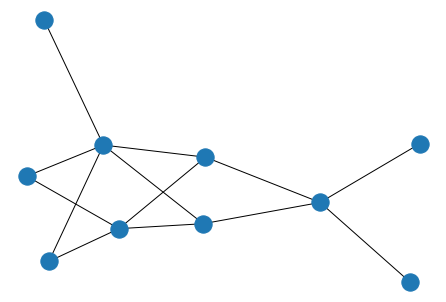

In [20]:
nx.draw(G,font_family='Malgun Gothic')

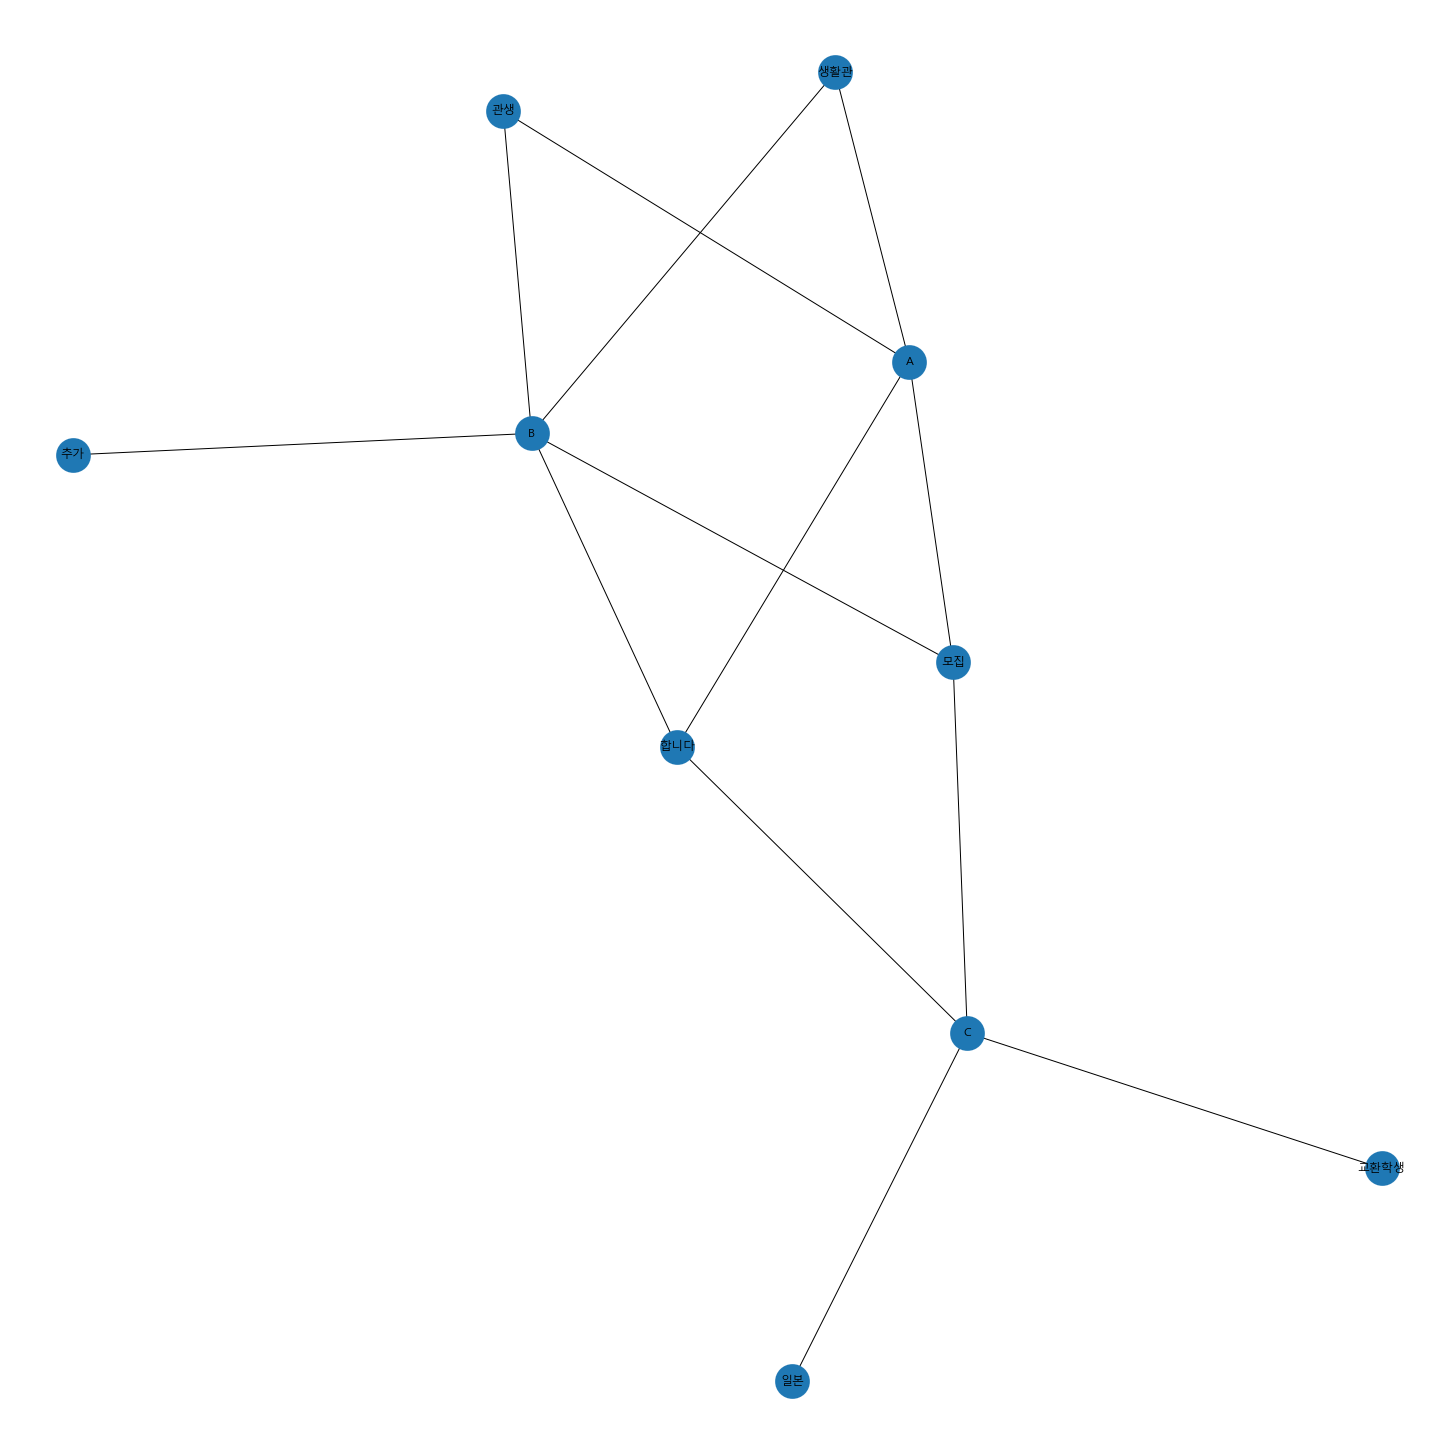

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw_kamada_kawai(G,node_size=1200,linewidths=0.1,font_size=30)
nx.draw_networkx_labels(G,pos,font_family='Malgun Gothic')
plt.savefig('network_version1.png',dpi=300)

In [23]:
check_between = pd.DataFrame([nx.betweenness_centrality(G).keys(),nx.betweenness_centrality(G).values()]).T
check_between.head()

0          1
0    A   0.162037
1  ÏÉùÌôúÍ¥Ä  0.0138889
2   Í¥ÄÏÉù  0.0138889
3   Î™®Ïßë   0.222222
4  Ìï©ÎãàÎã§   0.222222

In [24]:
check_between.sort_values(1,ascending=False).iloc[:30,:]

0          1
7     C   0.425926
5     B   0.384259
3    Î™®Ïßë   0.222222
4   Ìï©ÎãàÎã§   0.222222
0     A   0.162037
1   ÏÉùÌôúÍ¥Ä  0.0138889
2    Í¥ÄÏÉù  0.0138889
6    Ï∂îÍ∞Ä          0
8    ÏùºÎ≥∏          0
9  ÍµêÌôòÌïôÏÉù          0

In [25]:
check_between = pd.DataFrame([nx.degree_centrality(G).keys(),nx.degree_centrality(G).values()]).T
check_between.head()

0         1
0    A  0.444444
1  ÏÉùÌôúÍ¥Ä  0.222222
2   Í¥ÄÏÉù  0.222222
3   Î™®Ïßë  0.333333
4  Ìï©ÎãàÎã§  0.333333

In [26]:
check_between.sort_values(1,ascending=False).iloc[:30,:]

0         1
5     B  0.555556
0     A  0.444444
7     C  0.444444
3    Î™®Ïßë  0.333333
4   Ìï©ÎãàÎã§  0.333333
1   ÏÉùÌôúÍ¥Ä  0.222222
2    Í¥ÄÏÉù  0.222222
6    Ï∂îÍ∞Ä  0.111111
8    ÏùºÎ≥∏  0.111111
9  ÍµêÌôòÌïôÏÉù  0.111111

In [87]:
### between centrality 33, 0 , 131, 89, 9
every.iloc[[33,0,89,9,17,131,129,207,208,13,168,164,257],:]

days  like  daegle  scrape  \
33   21/07/28 19:54   178      67     410   
0    21/07/12 01:02   496      33    1271   
89   21/07/12 22:02   108       7     305   
9    21/08/14 18:04   283      18    1205   
17   21/10/20 16:01   222      47     491   
131  21/05/10 13:32   227      37    1018   
129  21/03/01 16:09   242      29     387   
207  21/01/26 14:42   108      42     559   
208  21/01/27 00:37   108      15     743   
13   21/07/27 21:08   255      29     897   
168  21/03/02 05:29   140      80     515   
164  21/06/11 04:30   143      24     693   
257  20/07/22 20:24   162      32    1014   

                                               context  \
33   Í≥µÍ∏∞ÏóÖ Ìï©Í≤©ÏàòÍ∏∞!!! Í≥µÍ∏∞ÏóÖ Ï∑®ÏóÖÌñàÏäµÎãàÎã§!, , ÌïúÍµ≠Í∞ÄÏä§Í∏∞Ïà†Í≥µÏÇ¨ Í∏∞Í≥ÑÏßÅ ÏµúÏ¢ÖÌï©Í≤©ÌñàÏäµ...   
0    ÌÜ†Ïùµ RC Í≥µÎûµÎ≤ï ‚àô ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä 700 Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ ‚àô‚àô...   
89   ÌÜ†Ïùµ LC Í≥µÎûµÎ≤ï LCÎäî ÏãúÌóò Îïå ÎßêÍ≥† Ìëº Ï†ÅÏù¥ Î≥ÑÎ°ú ÏóÜÎã§Î≥¥Îãà ÎÖ∏Î†•Ìï¥ÏÑú Ï†êÏàò Ïò¨Î¶∞ ...   
9    ‚≠êÏ∑®Î¶∞Ïù¥Î•º ÏúÑÌïú Ï∑®ÏóÖ Ï§ÄÎπÑ ÏãúÏûë Î∞©Î≤ï Ï†ïÎ¶¨‚≠ê ÎãπÏû•Ïóê Ï∑®ÏóÖÏùÑ Ï§ÄÎπÑÌï¥Ïïº ÌïòÎäîÎç∞,, Ïñ¥Îñª...   
17   [655->835] üçíÌÜ†Ïùµ 2Îã¨ Í≥µÎ∂Ä ÌõÑÍ∏∞üçífeat Íµ≠Ï†úÏñ¥ÌïôÏõê Í∞ïÏùò, Í∑∏ Ïô∏ ÎèÖÌïô ...   
131  Ïû¨ÏàòÍ∞ïÌïòÎ†§Îäî ÏπúÍµ¨Îì§ÏïÑ ! Ï∞∏Í≥†Ìï¥ ! 1ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê D+Î∞õÏùÄ Í≥ºÎ™© 2ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê ...   
129  ÌïëÌîÑ ÎãµÎãµÌï¥ÏÑú ÎÇ¥Í∞Ä Ï†ïÎ¶¨ÌñàÎã§ ÎåìÍ∏ÄÎ°ú Ï∂îÍ∞ÄÌï†Í±∞ ÏûàÏùå Ï†ÅÏñ¥Î¥ê, Í∑∏Îüº ÎÇ¥Í∞Ä Ï†ïÎ¶¨Ìï¥ÏÑú ÏÉùÍ∞Å...   
207  ÏßÄÎÇòÍ∞ÄÎçò 4ÌïôÎÖÑÏûÖÎãàÎã§ ~! ÏãúÍ∞ÑÌëú Ï°∞ÌöåÎäî Ïñ¥ÎîîÏÑú? Í≤ΩÏÉÅÎåÄÌïôÍµê Ï†ïÎ≥¥ÎÇòÎàîÌÑ∞ - ÏàòÍ∞ï,Í∞ï...   
208  tmi) ÎÇ¥Í∞Ä Ïò¨Î†∏Îçò Í≤åÏãúÍ∏ÄÎì§... , ÏßÑÏßú ÎßéÎÑ§Ïöî., , 0. ÏóêÌÉÄ ÌïëÌîÑÍ∞Ä ÎêòÏßÄ ...   
13   ÏûêÌïÑ ÏÑúÎ™ÖÏùÑ ÌïúÍ∏Ä ÌååÏùºÏóê ÎÑ£Ïñ¥Î≥¥Ïûê! ÏïàÎÖï Í≤ΩÏÉÅÎåÄÌïôÏö∞Î∂ÑÎì§, , ÏµúÍ∑ºÏóê ÎπÑÎåÄÎ©¥ ÎïåÎ¨∏Ïóê ...   
168  Learning X Í∞ïÏùò Ïç®Î≥¥Î©¥ÏÑú ÎäêÎÇÄ Ï†ê Ïù¥Í±∞ Ïì¥Îã§Í≥† 4ÏãúÍ∞ÑÎèôÏïà Í∞ïÏùòÎßå Î™á Í∞ú Îì§...   
164  lms Ïó¥Îûå Í∏∞Í∞Ñ ÏßÄÎÇú Í∞ïÏùò Î≥¥ÎäîÎ≤ï Í≥µÏú†Ìï® ÏãúÌóò Í∏∞Í∞ÑÏù∏Îç∞ Í∞ïÏùò Îã´ÌòÄÏÑú Î™ª Î≥¥ÏãúÎäî Î∂Ñ...   
257  ÌïúÎä•Í≤Ä Ï§ÄÎπÑ ÌåÅ! Ïù¥Î≤àÏóê 6/27 ÌïúÍµ≠ÏÇ¨ ÏãúÌóò 1Í∏â Î∞õÏïòÏäµÎãàÎãπ !, Í∑∏ÎûòÏÑú ÌåÅÏùÑ Ï†ï...   

                                                 clean  
33   Í≥µÍ∏∞ÏóÖ Ìï©Í≤©ÏàòÍ∏∞ Í≥µÍ∏∞ÏóÖ Ï∑®ÏóÖÌñàÏäµÎãàÎã§ ÌïúÍµ≠Í∞ÄÏä§Í∏∞Ïà†Í≥µÏÇ¨ Í∏∞Í≥ÑÏßÅ ÏµúÏ¢Ö Ìï©Í≤©ÌñàÏäµÎãàÎã§ Í≥µÍ∏∞ÏóÖ...  
0    ÌÜ†Ïùµ Í≥µÎûµÎ≤ï ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ Î®ºÏ†Ä ÌíÄÏñ¥Î≥∏Îã§ Ìïú Î≤à...  
89   ÌÜ†Ïùµ Í≥µÎûµÎ≤ïÏùÄ ÏãúÌóò Îïå ÎßêÍ≥† Ìëº Ï†ÅÏù¥ Î≥ÑÎ°ú ÏóÜÎã§ Î≥¥Îãà ÎÖ∏Î†•Ìï¥ÏÑú Ï†êÏàò Ïò¨Î¶∞ ÏÇ¨ÎûåÎì§Ïùò ...  
9    Ï∑®Î¶¨ ÎÇòÏù¥Î•º ÏúÑÌïú Ï∑®ÏóÖ Ï§ÄÎπÑ ÏãúÏûë Î∞©Î≤ï Ï†ïÎ¶¨ ÎãπÏû•Ïóê Ï∑®ÏóÖÏùÑ Ï§ÄÎπÑÌï¥Ïïº ÌïòÎäîÎç∞ Ïñ¥ÎñªÍ≤å ...  
17   ÌÜ†Ïùµ Í≥µÎ∂Ä ÌõÑÍ∏∞ Íµ≠Ï†úÏñ¥ÌïôÏõê Í∞ïÏùò Í∑∏ Ïô∏ ÎèÖÌïô ÏïàÎÖïÌïòÏÑ∏Ïöî ÌÜ†Ïùµ Ï§ÄÎπÑÌïòÏãúÎäî ÌïôÏö∞ Ïó¨Îü¨Î∂Ñ...  
131  Ïû¨ÏàòÍ∞ïÌïòÎ†§Îäî ÏπúÍµ¨Îì§ÏïÑ Ï∞∏Í≥†Ìï¥ Î∞õÏùÄ Í≥ºÎ™© Î∞õÍ≥† Îì£Í≥† Îì§Ïñ¥ÏÑú Ï†ïÎ¶¨ÌïòÎ©¥ Ïû¨ÏàòÍ∞ïÌñàÏúºÎãà ÏµúÏ¥à...  
129  ÌïëÌÅ¨ ÎãµÎãµÌï¥ÏÑú ÎÇ¥Í∞Ä Ï†ïÎ¶¨ÌñàÎã§ ÎåìÍ∏ÄÎ°ú Ï∂îÍ∞ÄÌï† Í±∞ ÏûàÏùå Ï†ÅÏñ¥Î¥ê Í∑∏Îüº ÎÇ¥Í∞Ä Ï†ïÎ¶¨Ìï¥ÏÑú ÏÉùÍ∞Å...  
207  ÏßÄÎÇòÍ∞ÄÎçò ÏãúÍ∞ÑÌëú Ï°∞ÌöåÎäî Ïñ¥ÎîîÏÑú Í≤ΩÏÉÅÎåÄÌïôÍµê Ï†ïÎ≥¥ ÎÇòÎàîÌÑ∞ ÏàòÍ∞ï Í∞ïÏùòÌèâÍ∞Ä ÏÑ±Ï†Å Î©îÎâ¥ÏóêÏÑú ...  
208  ÎÇ¥Í∞Ä Ïò¨Î†∏Îçò Í≤åÏãúÍ∏ÄÎì§ ÏßÑÏßú ÎßéÎÑ§Ïöî ÏóêÌÉÄ ÌïëÌÅ¨Í∞Ä ÎêòÏßÄ ÏïäÎäî Î∞©Î≤ïÏóê ÌÉÄ Í≤ÄÏÉâ Í∏∞Îä• ÏàòÏóÖ...  
13   ÏûêÌïÑ ÏÑúÎ™ÖÏùÑ ÌïúÍ∏Ä ÌååÏùºÏóê ÎÑ£Ïñ¥Î≥¥Ïûê ÏïàÎÖï Í≤ΩÏÉÅÎåÄ ÌïôÏö∞Î∂ÑÎì§ ÏµúÍ∑ºÏóê ÎπÑÎåÄÎ©¥ ÎïåÎ¨∏Ïóê Î¨∏ÏÑú ...  
168  Í∞ïÏùò Ïç®Î≥¥Î©¥ÏÑú ÎäêÎÇÄ Ï†ê Ïù¥Í±∞ Ïì¥Îã§Í≥† Í∞ïÏùòÎßå Î™á Í∞ú Îì§ÏùÄ Í±∏ÍπåÏöî ÎèÑÎπÑÎäî Ï∂úÍ∑ºÌï¥Ïïº ÌïòÎäî...  
164  Ïó¥Îûå Í∏∞Í∞Ñ ÏßÄÎÇú Í∞ïÏùò Î≥¥Îäî Î≤ï Í≥µÏú†Ìï® ÏãúÌóò Í∏∞Í∞ÑÏù∏Îç∞ Í∞ïÏùò Îã´ÌòÄÏÑú Î™ª Î≥¥ÏãúÎäî Î∂ÑÎì§ ÏúÑ...  
257  ÌïúÎä•Í≤Ä Ï§ÄÎπÑ ÌåÅ Ïù¥Î≤àÏóê ÌïúÍµ≠ÏÇ¨ ÏãúÌóòÎ∞õÏïòÏäµÎãàÎã§ Í∑∏ÎûòÏÑú ÌåÅÏùÑ Ï†ïÎ¶¨Ìï¥ÏÑú ÌïúÍµ≠ÏÇ¨ ÏãúÌóò Ï§ÄÎπÑ...

In [93]:
sentencess = []
for i in every.iloc[[33,0,131,89,9],:].context:
    sentencess.append(kss.split_sentences(i)[:3])

In [105]:
sentencess[0][2]

'Í≤åÏûÑÏóêÏÑú ÌÄòÏä§Ìä∏Î•º Íπ¨Îã§Îäî ÏÉùÍ∞ÅÏúºÎ°ú Ï∑®ÏóÖÏù¥ÎùºÎäî ÌÄòÏä§Ìä∏Ïóê ÌïúÎ∞úÏî© Îã§Í∞ÄÍ∞ÑÎã§Îäî ÏÉùÍ∞ÅÏúºÎ°ú Ï¶êÍ∏∞ÏÑ∏Ïöî!, Ïò¨Ìï¥Î∂ÄÌÑ∞Îäî Í≥µÍ∏∞ÏóÖ ÎåÄÎ∂ÄÎ∂ÑÏù¥ ÏÑúÎ•òÎ∞∞ÏàòÍ∞Ä ÏÉùÍ≤® ÏåçÍ∏∞ÏÇ¨Í∞Ä ÏÑ†ÌÉùÏù¥ ÏïÑÎãå ÌïÑÏàòÍ∞Ä ÎêòÏóàÏäµÎãàÎã§.'

In [106]:
every.iloc[[33,0,131,89,9],:]

days  like  daegle  scrape  \
33   21/07/28 19:54   178      67     410   
0    21/07/12 01:02   496      33    1271   
131  21/05/10 13:32   227      37    1018   
89   21/07/12 22:02   108       7     305   
9    21/08/14 18:04   283      18    1205   

                                               context  \
33   Í≥µÍ∏∞ÏóÖ Ìï©Í≤©ÏàòÍ∏∞!!! Í≥µÍ∏∞ÏóÖ Ï∑®ÏóÖÌñàÏäµÎãàÎã§!, , ÌïúÍµ≠Í∞ÄÏä§Í∏∞Ïà†Í≥µÏÇ¨ Í∏∞Í≥ÑÏßÅ ÏµúÏ¢ÖÌï©Í≤©ÌñàÏäµ...   
0    ÌÜ†Ïùµ RC Í≥µÎûµÎ≤ï ‚àô ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä 700 Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ ‚àô‚àô...   
131  Ïû¨ÏàòÍ∞ïÌïòÎ†§Îäî ÏπúÍµ¨Îì§ÏïÑ ! Ï∞∏Í≥†Ìï¥ ! 1ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê D+Î∞õÏùÄ Í≥ºÎ™© 2ÌïôÎÖÑ 2ÌïôÍ∏∞Ïóê ...   
89   ÌÜ†Ïùµ LC Í≥µÎûµÎ≤ï LCÎäî ÏãúÌóò Îïå ÎßêÍ≥† Ìëº Ï†ÅÏù¥ Î≥ÑÎ°ú ÏóÜÎã§Î≥¥Îãà ÎÖ∏Î†•Ìï¥ÏÑú Ï†êÏàò Ïò¨Î¶∞ ...   
9    ‚≠êÏ∑®Î¶∞Ïù¥Î•º ÏúÑÌïú Ï∑®ÏóÖ Ï§ÄÎπÑ ÏãúÏûë Î∞©Î≤ï Ï†ïÎ¶¨‚≠ê ÎãπÏû•Ïóê Ï∑®ÏóÖÏùÑ Ï§ÄÎπÑÌï¥Ïïº ÌïòÎäîÎç∞,, Ïñ¥Îñª...   

                                                 clean  
33   Í≥µÍ∏∞ÏóÖ Ìï©Í≤©ÏàòÍ∏∞ Í≥µÍ∏∞ÏóÖ Ï∑®ÏóÖÌñàÏäµÎãàÎã§ ÌïúÍµ≠Í∞ÄÏä§Í∏∞Ïà†Í≥µÏÇ¨ Í∏∞Í≥ÑÏßÅ ÏµúÏ¢Ö Ìï©Í≤©ÌñàÏäµÎãàÎã§ Í≥µÍ∏∞ÏóÖ...  
0    ÌÜ†Ïùµ Í≥µÎûµÎ≤ï ÏûêÏã†Ïùò Ï†êÏàòÍ∞Ä Ïù¥ÌïòÎã§ ÌòπÏùÄ ÎÇ¥ ÏúÑÏπòÎ•º Ïûò Î™®Î•¥Í≤†Îã§ Î®ºÏ†Ä ÌíÄÏñ¥Î≥∏Îã§ Ìïú Î≤à...  
131  Ïû¨ÏàòÍ∞ïÌïòÎ†§Îäî ÏπúÍµ¨Îì§ÏïÑ Ï∞∏Í≥†Ìï¥ Î∞õÏùÄ Í≥ºÎ™© Î∞õÍ≥† Îì£Í≥† Îì§Ïñ¥ÏÑú Ï†ïÎ¶¨ÌïòÎ©¥ Ïû¨ÏàòÍ∞ïÌñàÏúºÎãà ÏµúÏ¥à...  
89   ÌÜ†Ïùµ Í≥µÎûµÎ≤ïÏùÄ ÏãúÌóò Îïå ÎßêÍ≥† Ìëº Ï†ÅÏù¥ Î≥ÑÎ°ú ÏóÜÎã§ Î≥¥Îãà ÎÖ∏Î†•Ìï¥ÏÑú Ï†êÏàò Ïò¨Î¶∞ ÏÇ¨ÎûåÎì§Ïùò ...  
9    Ï∑®Î¶¨ ÎÇòÏù¥Î•º ÏúÑÌïú Ï∑®ÏóÖ Ï§ÄÎπÑ ÏãúÏûë Î∞©Î≤ï Ï†ïÎ¶¨ ÎãπÏû•Ïóê Ï∑®ÏóÖÏùÑ Ï§ÄÎπÑÌï¥Ïïº ÌïòÎäîÎç∞ Ïñ¥ÎñªÍ≤å ...

In [2]:
import numpy as np
a = np.array([[0,0,-0.28768,-0.28769,-0.28768,0,0,0],[0,0,-0.28768,-0.28768,-0.2768,0.40547,0,0],[0,0,-0.28768,-0.28768,-0.28768,0,0.40547,0.40547]])

In [3]:
a @ a.T

array([[0.2482851 , 0.24515227, 0.24828222],
       [0.24515227, 0.40654373, 0.24514939],
       [0.24828222, 0.24514939, 0.57709119]])